In [14]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [15]:
# Parameters
n_max = 10                  # Max bosons per site
U = 1.0                    # Interaction strength
z = 2                      # Coordination number 
mu_vals = np.linspace(0, n_max * U, 200)
t_vals = np.linspace(0.0, 0.1, 200)

In [16]:
# Hilbert space
a = destroy(n_max + 1)
n_op = a.dag() * a

# Output grid
MU, T = np.meshgrid(mu_vals, t_vals)
phase = np.zeros_like(MU)

def mean_field_hamiltonian(mu, t, psi):
    H = (U / 2) * n_op * (n_op - 1) - mu * n_op
    H += -z * t * (psi * a.dag() + psi * a - psi**2)
    return H


In [17]:
def self_consistent_psi(mu, t, tol=1e-6, max_iter=100):
    psi = 0.1
    for _ in range(max_iter):
        H = mean_field_hamiltonian(mu, t, psi)
        gs = H.groundstate()[1]
        new_psi = expect(a, gs)
        if abs(new_psi - psi) < tol:
            break
        psi = new_psi
    return abs(psi)

In [18]:
# Compute the phase diagram
for i in range(len(t_vals)):
    for j in range(len(mu_vals)):
        mu = mu_vals[j]
        t = t_vals[i]
        psi = self_consistent_psi(mu, t)
        phase[i, j] = psi

/Users/ramanujraman/mambaforge3/envs/quantum/lib/python3.12/site-packages/qutip/core/qobj.py:1626: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


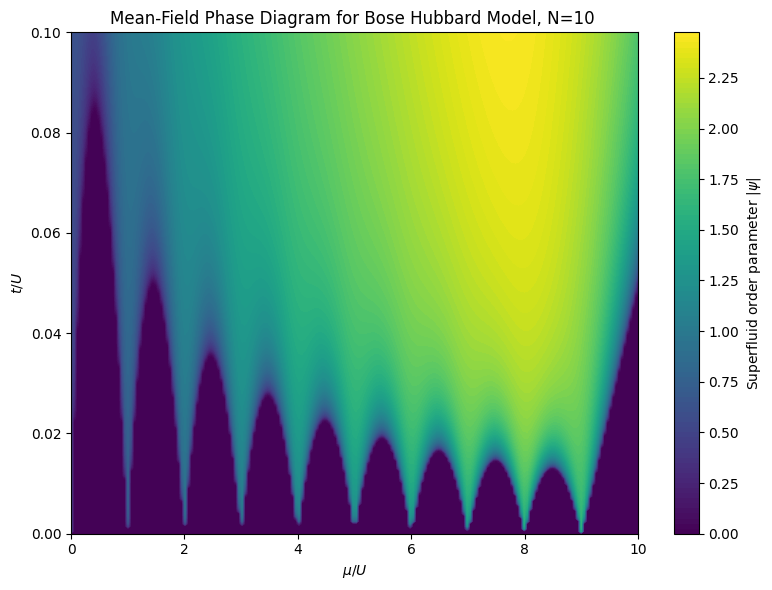

In [19]:
plt.figure(figsize=(8, 6))
plt.contourf(MU / U, T / U, phase, levels=100, cmap='viridis')
plt.colorbar(label=r'Superfluid order parameter $|\psi|$')
#plt.contour(MU / U, T / U, phase, levels=[1e-3], colors='white', linewidths=1.5)
plt.xlabel(r'$\mu / U$')
plt.ylabel(r'$t / U$')
plt.title('Mean-Field Phase Diagram for Bose Hubbard Model, N=10 ')
plt.grid(False)
plt.tight_layout()
plt.show()